# Churning Telecom Company Prediction with Python
#### Author: <a href="https://tonmoy-talukder.netlify.app/">Tonmoy Talukder</a>
CS Undergrad, <a href="https://www.aust.edu/"> AUST</a>, Dhaka 1208, Bangladesh

## Dataset Reference: 
<a href="https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python">Browse The Dataset</a>

**Objectives:**
- One-hot Encoding
- Decision Tree Classification
- Data Transformation
- Cross-Validation
- Grid Search
- Tree diagram of the Decision Tree
- Confusion Matrix, Classification report, and ROC-AUC
- Explaining accuracy, precision, recall, f1 score

#### Import required libraries

In [494]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns





# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import plot_tree
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.model_selection import GridSearchCV

# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

# import matplotlib.pyplot as plt
# import seaborn as sns








import warnings
warnings.filterwarnings('ignore')

#### Load Data
Dataset Source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

In [495]:
df = pd.read_csv("Churn.csv")

display(df.head(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,98,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,88,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,79,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,97,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,84,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


In [496]:
print(df.shape)

(3333, 21)


In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#### Data preprocessing

In [498]:
print(df['Churn'].unique())
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']


In [499]:
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)

df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))

display(df.head(10))
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


(3333, 18)


In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

### Checking missing value

In [501]:
#check missing value 
df.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
dtype: int64

> **There are no missing value in this dataset.**

#### Target variable

In [502]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

#### Feature and target variable separation

In [503]:
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print("Features:" ,X.shape)
print("Targets:" ,y.shape)

Features: (3333, 17)
Targets: (3333, 1)


### One-hot Encoding or Label Encoding

>> **We apply One-Hot Encoding when:**
>> - The categorical feature is not ordinal (like the countries above)
>> - The number of categorical features is less so one-hot encoding can be effectively applied

>> In this dataset, there are three categorical features are *NAN* columns. So, they are not ordinal and also in number there are less number of categorical variables. 

>> In addition, each label is assigned a unique integer based on alphabetical ordering in Label Encoding technique. And prediction performance is not also better than One-hot encoding for this data set.

> **That's I am choosing One-hot encoding**

#### One-hot Encoding

In [504]:
df = pd.get_dummies(df, drop_first=True)

#### Train test separation

In [505]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 17) (667, 17) (2666, 1) (667, 1)


#### Stratification

In [506]:
class_0_train = y_train['Churn'].value_counts().values[0]
class_1_train = y_train['Churn'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print(train_ratio)

0.1692982456140351


In [507]:
class_0_test = y_test['Churn'].value_counts().values[0]
class_1_test = y_test['Churn'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print(test_ratio)

0.17017543859649123


### Training: Decision Tree Classifier

In [508]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

#### Prediction

In [509]:
y_pred = model.predict(X_test)

#### Prediction Comparison with the test data

In [510]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_Churn'] = y_pred

display(y_test.sample(10))

,Churn,probability,predicted_Churn
1219,0,0.0,0
2058,0,0.0,0
3312,0,0.0,0
581,0,0.0,0
1132,0,0.0,0
976,0,0.0,0
2743,0,0.0,0
2358,0,0.0,0
1215,0,0.0,0
1317,0,0.0,0


In [511]:
test = pd.concat([X_test, y_test], axis=1)
display(test.sample(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn,probability,predicted_Churn
2861,75,19,210.3,241.8,215.7,13.1,4,0,1,90,35.75,87,20.55,102,9.71,3,3.54,0,0.0,0
3131,107,0,189.7,156.1,244.0,8.3,5,0,0,76,32.25,65,13.27,91,10.98,3,2.24,0,0.0,0
84,106,0,210.6,249.2,191.4,12.4,2,0,0,96,35.80,85,21.18,88,8.61,1,3.35,1,0.0,0
2743,90,0,198.5,266.6,243.3,8.0,2,0,0,124,33.75,100,22.66,80,10.95,7,2.16,0,0.0,0
3239,87,33,125.0,235.3,215.3,10.2,2,0,1,99,21.25,81,20.00,95,9.69,7,2.75,0,0.0,0
2929,71,0,185.0,232.5,191.1,14.9,3,0,0,84,31.45,129,19.76,82,8.60,4,4.02,0,0.0,0
567,85,0,216.0,188.2,147.1,3.6,2,1,0,73,36.72,117,16.00,98,6.62,7,0.97,0,0.0,0
244,108,0,198.5,267.8,354.9,9.4,0,0,0,99,33.75,60,22.76,75,15.97,3,2.54,1,0.0,0
1806,107,0,241.9,126.9,185.6,11.7,0,0,0,102,41.12,117,10.79,92,8.35,6,3.16,0,0.0,0
1815,101,42,209.2,159.7,181.6,9.5,0,0,1,82,35.56,74,13.57,100,8.17,3,2.57,0,0.0,0


### Data Transformation (StandardScaler or MinMaxScaler)

In [512]:
# scaler = StandardScaler() # For StandardScaler
# scaler = MinMaxScaler() # For MinMaxScaler

# print(scaler.fit(test))

In [513]:
# print(scaler.mean_) # For StandardScaler
# print(scaler.data_max_) # For MinMaxScaler

In [514]:
# print(scaler.transform(test.head(10)))

#### Does Data Transformation improve model performance?

> No, Data transmission does not improve model performance actually. From this model, I am getting betetr precision with Standard Scaler or Min Max Scaler transformation. 

#### Is it necessary to standardize or normalize data for tree-based machine learning models?

> Tree based algorithms such as Decision Tree, is not sensitive to the magnitude of variables. So standardization is not needed before fitting this kind of models. And doesn't require normalization also.

### Tree diagram of the Decision Tree

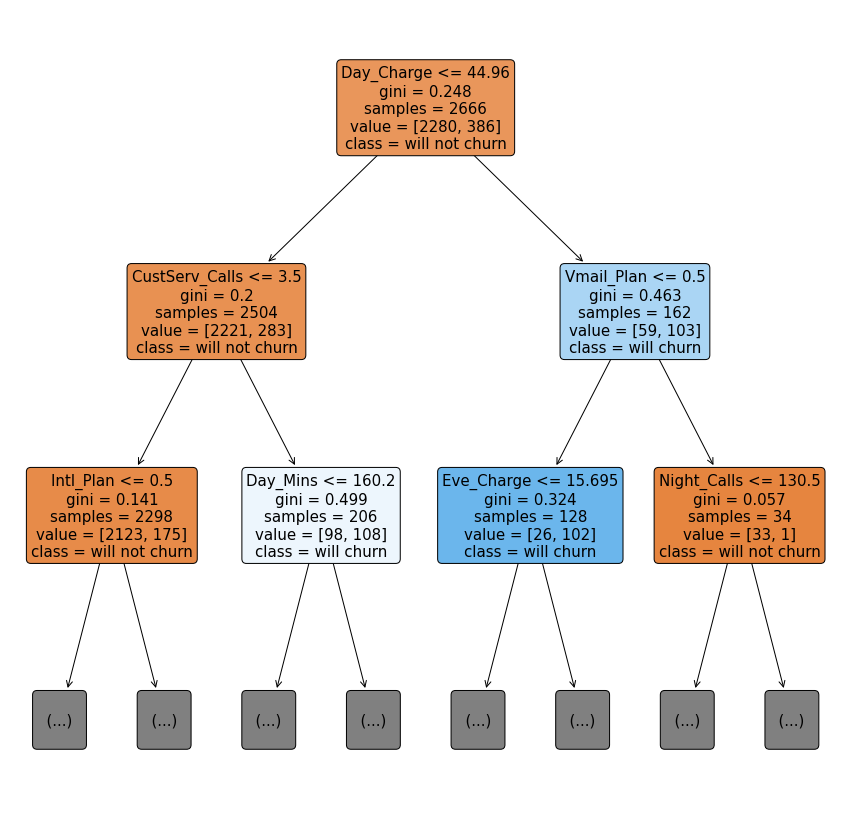

In [515]:
plt.figure(figsize = (15, 15))
plot_tree(model, 
          filled=True,
          rounded=True,
          class_names = ["will not churn", "will churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

### Confusion Matrix

In [516]:
confusion_matrix_ = confusion_matrix(y_test['Churn'], 
                                     y_test['predicted_Churn'])

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[542  28]
 [ 34  63]]


In [517]:
y_test['Churn'].value_counts()

0    570
1     97
Name: Churn, dtype: int64

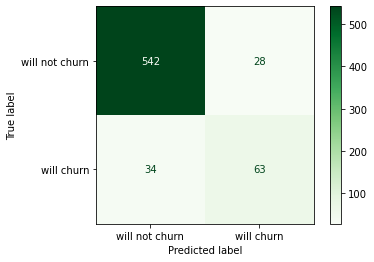

In [518]:
plot_confusion_matrix(model, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='Greens')
plt.show()

In [519]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  542
False Negatives =  34
False Positives =  28
True Positives =  63


### Accuracy, Precision, Recall, f1 score

#### Accuracy

In [520]:
# calculate the accuracy of the model using the sklearn built-in function
accuracy_ = accuracy_score(y_test['Churn'], 
                           y_test['predicted_Churn'])

print('Accuracy = ', np.round(accuracy_*100, 2),"%") #Higher Better

Accuracy =  90.7 %


#### Precision, Recall, f1 score

In [521]:
precision_ = np.round(precision_score(y_test['Churn'], 
                                      y_test['predicted_Churn']), 2)
recall_ = np.round(recall_score(y_test['Churn'], 
                                y_test['predicted_Churn']), 2)
f1_score__ = np.round(f1_score(y_test['Churn'], 
                               y_test['predicted_Churn']), 2)

print("Precision = ", precision_*10)
print("Recall = ", recall_*10)
print("f1 score = ", f1_score__*10)

Precision =  6.8999999999999995
Recall =  6.5
f1 score =  6.7


#### True Positive Rate, False Positive Rate

In [522]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.65
False Positive Rate =  0.05


### ROC-AUC

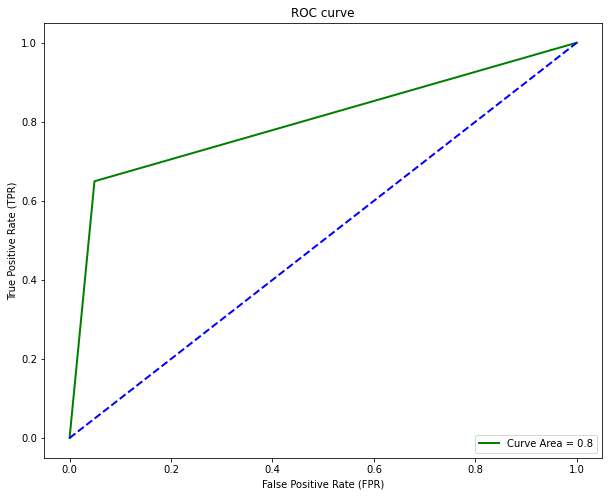

In [523]:
fpr, tpr, thr = roc_curve(y_test['Churn'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['Churn'], 
                             y_test['predicted_Churn']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [524]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": fpr, "TPR": tpr})
display(roc_data.tail(10))

,threshold,FPR,TPR
0,2.0,0.000000,0.000000
1,1.0,0.049123,0.649485
2,0.0,1.000000,1.000000


### Grid Search and Cross-Validation with Decision Tree Classifier

In [525]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)


#### hyperparameters for grid search in each iteration
- iteration 1: criterion='gini', max_depth=3
- iteration 2: criterion='gini', max_depth=4
- iteration 3: criterion='gini', max_depth=5
- iteration 4: criterion='gini', max_depth=6
- iteration 5: criterion='gini', max_depth=7
- iteration 6: criterion='entropy', max_depth=3
- iteration 7: criterion='entropy', max_depth=4
- iteration 8: criterion='entropy', max_depth=5
- iteration 9: criterion='entropy', max_depth=6
- iteration 10: criterion='entropy', max_depth=7

In [526]:
y_pred = np.round(grid_result.predict(X_test), 2)

#### Best hyperparameters in the grid search

In [527]:
grid_result.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [528]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,gini,6,0.943820,0.951220,0.954972,0.949343,0.947467,0.949364,0.003721,1
9,entropy,7,0.945693,0.941839,0.958724,0.951220,0.943715,0.948238,0.006111,2
8,entropy,6,0.943820,0.934334,0.958724,0.949343,0.943715,0.945987,0.007989,3
4,gini,7,0.936330,0.945591,0.958724,0.949343,0.938086,0.945615,0.008107,4
2,gini,5,0.930712,0.943715,0.947467,0.953096,0.938086,0.942615,0.007705,5
7,entropy,5,0.934457,0.938086,0.951220,0.945591,0.939962,0.941863,0.005902,6
1,gini,4,0.923221,0.932458,0.924953,0.930582,0.917448,0.925732,0.005372,7
6,entropy,4,0.923221,0.926829,0.924953,0.932458,0.917448,0.924982,0.004882,8
0,gini,3,0.898876,0.919325,0.904315,0.904315,0.904315,0.906229,0.006878,9
5,entropy,3,0.898876,0.881801,0.904315,0.906191,0.904315,0.899100,0.008989,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


#### Model performance evaluation with the best found model in grid search and cross-validation

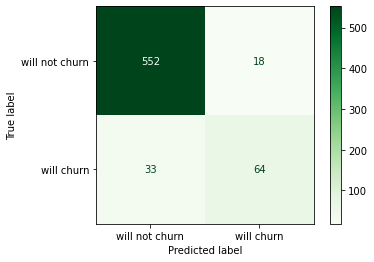

In [529]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='Greens')
plt.show()

In [530]:
confusion_matrix_dt = confusion_matrix(y_test['Churn'], y_pred)
print('confusion_matrix: \n', confusion_matrix_dt)

print('Accuracy: ', accuracy_score(y_test['Churn'], y_pred))

print(classification_report(y_test['Churn'], y_pred))

confusion_matrix: 
 [[552  18]
 [ 33  64]]
Accuracy:  0.9235382308845578
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       570
           1       0.78      0.66      0.72        97

    accuracy                           0.92       667
   macro avg       0.86      0.81      0.84       667
weighted avg       0.92      0.92      0.92       667



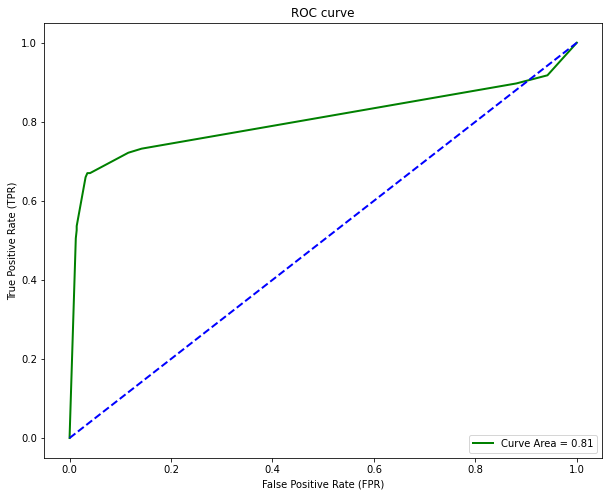

In [531]:
fpr, tpr, thr = roc_curve(y_test['Churn'], grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test['Churn'], y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [532]:
y_test['pred'] = y_pred
y_test['probability'] = grid_result.predict_proba(X_test)[:,1]

display(y_test.head(20))

,Churn,probability,predicted_Churn,pred
601,1,1.000000,1,1
2050,0,0.023556,0,0
3200,0,0.022556,0,0
1953,0,0.023556,0,0
1119,0,0.023556,0,0
2204,0,0.023556,0,0
1888,0,0.023556,0,0
738,0,0.023556,0,0
3087,0,0.023556,0,0
539,0,0.023556,0,0


### Classification report

In [533]:
class_report = classification_report(y_test['Churn'], 
                                     y_test['predicted_Churn'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       570
           1       0.69      0.65      0.67        97

    accuracy                           0.91       667
   macro avg       0.82      0.80      0.81       667
weighted avg       0.90      0.91      0.91       667



## Outcome 

**Model Result:**
> **Model is saying 90.85% customers will churn.**

**About The Model:**
> *We are getting the Precision value from the model is 7.0 out of 10. What should be more near to 10. The Accuracy of the model is 90.85%. The accuracy rate is good enough but the precision value should be greater than 8 then we can say this model is pretty good, but the model is accurately resulting but the precision is not satisfactory.* 